# **Исследование объявлений о продаже квартир**

**Цель:**

Определение рыночной стоимости объектов недвижимости и типичных параметров квартир Санкт-Петербурга и Ленинградкой области, выявление аномалий для создания автоматизированной системы отслеживания мошеннической деятельности

**Описание:**

На основе данных сервиса Яндекс.Недвижимость необходимо определить рыночную стоимость объектов недвижимости разного типа, типичные параметры квартир, в зависимости от удаленности от центра.

В данных присутсвуют пропуски, аномалии и ошибки.

**Необходимо:**

Изучить данные;
Произвести предобработку данных;
Произвести исследовательский анализ данных;
Установить параметры, влияющие на стоимость недвижимости, в том числе:
Параметры квартир;
Территориальное расположение и инфраструктура;
Время публикации объявления.
Определить характер зависимости стоимости жилья от перечисленных параметров.

**Задачи исследования:**

**Этап 1: Загрузить, изучить и визуализировать данные**

Загрузим данные из файла в датафрейм. Изучим общую информацию о полученном датафрейме. Построим общую гистограмму для всех числовых столбцов таблицы.

**Этап 2: Предобработка данных**

Найдем и изучим пропущенные значения в столбцах. Заполним пропущенные значения, где это возможно. Изменим тип данных в выбранных столбцах. Устраним неявные дубликаты в столбце с названиями населённых пунктов. Устраним редкие и выбивающиеся значения.

**Этап 3: Добавление новых столбцов**

Добавим столбцы с параметрами: цена одного квадратного метра, день недели публикации объявления, месяц публикации объявления, год публикации объявления, тип этажа квартиры, расстояние до центра города в километрах.

**Этап 4: Исследовательский анализ данных**

Исследуем параметры объектов: общая площадь, жилая площадь, площадь кухни, цена объекта, количество комнат, высота потолков, этаж квартиры, тип этажа квартиры, общее количество этажей в доме, расстояние до центра города в метрах, расстояние до ближайшего аэропорта, расстояние до ближайшего парка, день и месяц публикации объявления. Построим гистограммы для каждого из этих параметров и описывайте наблюдения.

**Этап 5: Общий вывод**

Выведем полученные результаты и основные выводы проведённого исследования.

# Этап 1: Загрузка, изучение и визуализация данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('real_estate_data.csv', index_col='Unnamed: 0')

In [3]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3.0,2.70,16.0,51.0,8.0,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1.0,NaN,11.0,18.6,1.0,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2.0,NaN,5.0,34.3,4.0,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3.0,NaN,14.0,NaN,9.0,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2.0,3.03,14.0,32.0,13.0,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**Описание данных:**

*  locality_name — название населённого пункта
*  cityCenters_nearest — расстояние до центра города (м)
*  airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
*  parks_around3000 — число парков в радиусе 3 км
*  ponds_around3000 — число водоёмов в радиусе 3 км
*  parks_nearest — расстояние до ближайшего парка (м)
*  ponds_nearest — расстояние до ближайшего водоёма (м)
*  total_area — общая площадь квартиры в квадратных метрах (м²)
*  living_area — жилая площадь в квадратных метрах (м²)
*  kitchen_area — площадь кухни в квадратных метрах (м²)
*  ceiling_height — высота потолков (м)
*  floors_total — всего этажей в доме
*  floor — этаж
*  rooms — число комнат
*  studio — квартира-студия (булев тип)
*  open_plan — свободная планировка (булев тип)
*  balcony — число балконов
*  is_apartment — апартаменты (булев тип)
*  total_images — число фотографий квартиры в объявлении
*  first_day_exposition — дата публикации
*  last_price — цена на момент снятия с публикации
*  days_exposition — сколько дней было размещено объявление (от публикации до снятия)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14990 entries, 0 to 14989
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          14990 non-null  int64  
 1   last_price            14990 non-null  float64
 2   total_area            14990 non-null  float64
 3   first_day_exposition  14989 non-null  object 
 4   rooms                 14989 non-null  float64
 5   ceiling_height        9175 non-null   float64
 6   floors_total          14927 non-null  float64
 7   living_area           13793 non-null  float64
 8   floor                 14989 non-null  float64
 9   is_apartment          1736 non-null   object 
 10  studio                14989 non-null  object 
 11  open_plan             14989 non-null  object 
 12  kitchen_area          13568 non-null  float64
 13  balcony               7719 non-null   float64
 14  locality_name         14964 non-null  object 
 15  airports_nearest      11

In [5]:
df.shape

(14990, 22)

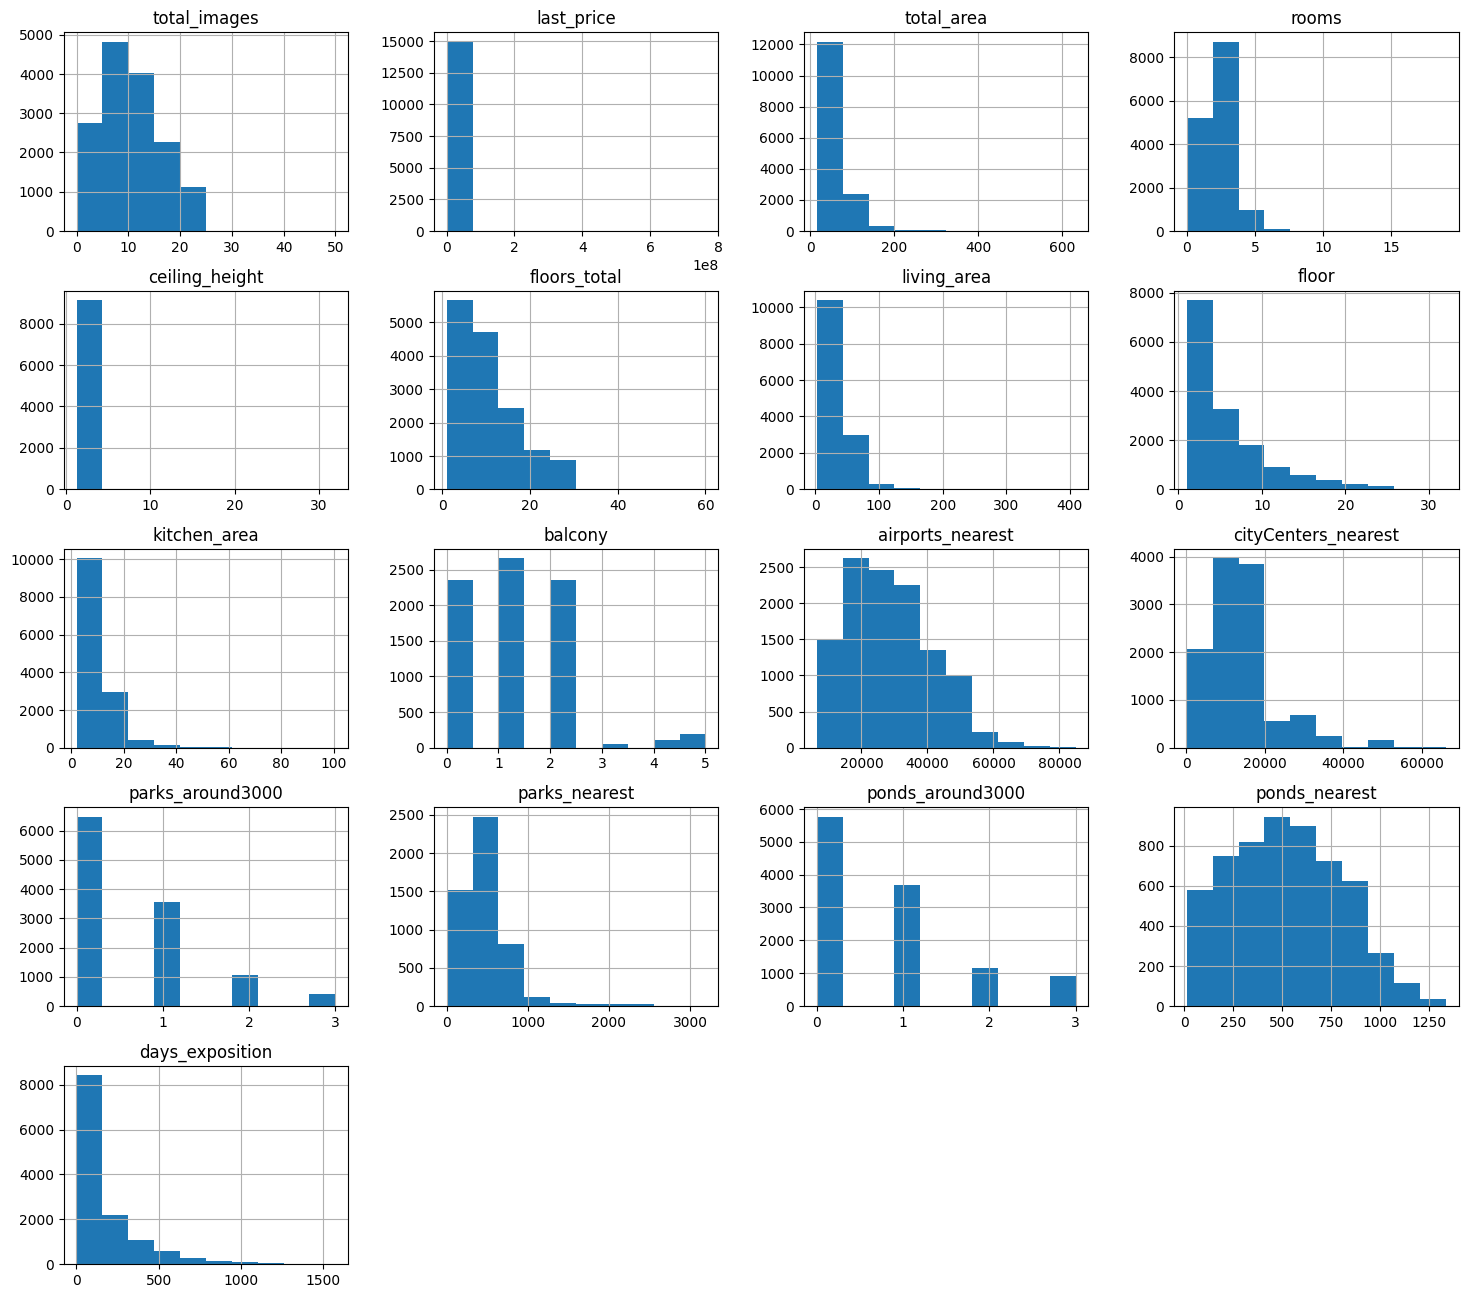

In [6]:
df.hist(figsize=(18,16))
plt.show()

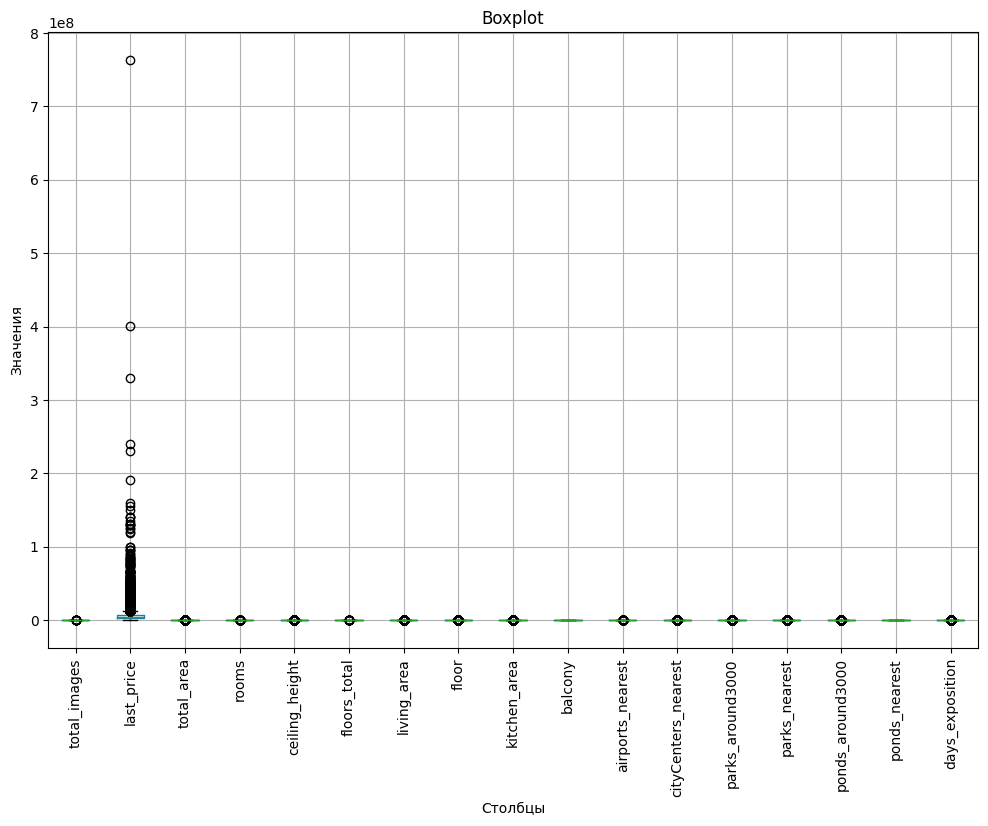

In [7]:
df.boxplot(figsize=(12, 8))
plt.xticks(rotation=90)
plt.xlabel('Столбцы')
plt.ylabel('Значения')
plt.title('Boxplot')


plt.show()

In [8]:
df['last_price'].describe().astype(int)

,last_price
count,14990
mean,6566121
std,11160748
min,12190
25%,3450000
50%,4659000
75%,6800000
max,763000000


**Вывод:**

Проблемы, которые нужно решить и понять:

1. много выбросов (надо понять их природу и устранить если требуется).
2. прыгающий регистр в названии столбцов;
3. некорректные типы данных;
4. много пропущенных значений;



# Этап 2. Предобработка данных

In [9]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])
df['floors_total'] = df['floors_total'].astype(pd.Int64Dtype(), errors='ignore')
df['balcony'] = df['balcony'].astype(pd.Int64Dtype(), errors='ignore')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14990 entries, 0 to 14989
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          14990 non-null  int64         
 1   last_price            14990 non-null  float64       
 2   total_area            14990 non-null  float64       
 3   first_day_exposition  14989 non-null  datetime64[ns]
 4   rooms                 14989 non-null  float64       
 5   ceiling_height        9175 non-null   float64       
 6   floors_total          14927 non-null  Int64         
 7   living_area           13793 non-null  float64       
 8   floor                 14989 non-null  float64       
 9   is_apartment          1736 non-null   object        
 10  studio                14989 non-null  object        
 11  open_plan             14989 non-null  object        
 12  kitchen_area          13568 non-null  float64       
 13  balcony              

In [11]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum()

,0
total_images,0
last_price,0
total_area,0
first_day_exposition,1
rooms,1
ceiling_height,5815
floors_total,63
living_area,1197
floor,1
is_apartment,13254


In [13]:
len(df['locality_name'].unique())

308

In [14]:
df['locality_name'] = df['locality_name'].str.lower()

In [15]:
len(df['locality_name'].unique())

308

In [16]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е', regex=True)

In [17]:
len(df['locality_name'].unique())

279

Отлично. Удалось найти дубликаты названий населенных пунктов.

In [18]:
df['locality_name'].isna().sum()

26

In [19]:
df = df.dropna(subset=['locality_name'])

In [20]:
df['locality_name'].isna().sum()

0

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14964 entries, 0 to 14988
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          14964 non-null  int64         
 1   last_price            14964 non-null  float64       
 2   total_area            14964 non-null  float64       
 3   first_day_exposition  14964 non-null  datetime64[ns]
 4   rooms                 14964 non-null  float64       
 5   ceiling_height        9168 non-null   float64       
 6   floors_total          14903 non-null  Int64         
 7   living_area           13769 non-null  float64       
 8   floor                 14964 non-null  float64       
 9   is_apartment          1730 non-null   object        
 10  studio                14964 non-null  object        
 11  open_plan             14964 non-null  object        
 12  kitchen_area          13547 non-null  float64       
 13  balcony              

In [22]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3.0,2.70,16,51.0,8.0,NaN,...,25.0,<NA>,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1.0,NaN,11,18.6,1.0,NaN,...,11.0,2,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2.0,NaN,5,34.3,4.0,NaN,...,8.3,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3.0,NaN,14,NaN,9.0,NaN,...,NaN,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2.0,3.03,14,32.0,13.0,NaN,...,41.0,<NA>,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [23]:
df['balcony'] = df['balcony'].fillna(value=0)

In [24]:
df_isna = pd.DataFrame(df.isnull().sum().sort_values() / df.shape[0] * 100)
df_isna.rename({0:'Nan, %'}, axis=1)

,"Nan, %"
total_images,0.000000
locality_name,0.000000
balcony,0.000000
open_plan,0.000000
floor,0.000000
studio,0.000000
rooms,0.000000
first_day_exposition,0.000000
total_area,0.000000
last_price,0.000000


Если имеется жилая площадь, то квартира не является апартаментом

In [25]:
df.loc[df['living_area'].notna(), 'is_apartment'] = False

Обратный случай: если кввартира является апартаментом, то она не имеет жилой площади

In [26]:
df.loc[df['is_apartment'] == True, 'living_area'] = 0

Доля пропусков floors_total составляет менее 1%, так что проще их удалить.

In [27]:
df.dropna(subset=['floors_total'], inplace=True)

In [28]:
df_isna = pd.DataFrame(df.isnull().sum().sort_values() / df.shape[0] * 100)
df_isna.rename({0:'Nan, %'}, axis=1)

,"Nan, %"
total_images,0.000000
locality_name,0.000000
balcony,0.000000
open_plan,0.000000
floor,0.000000
floors_total,0.000000
studio,0.000000
rooms,0.000000
first_day_exposition,0.000000
total_area,0.000000


In [29]:
df.describe()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,14903.000000,1.490300e+04,14903.000000,14903,14903.000000,9164.000000,14903.0,13739.00000,14903.000000,13520.000000,14903.0,11441.000000,11456.000000,11456.000000,5017.000000,11456.000000,5718.000000,12905.000000
mean,9.870362,6.567827e+06,60.552300,2017-11-08 09:08:26.555726848,2.080588,2.762994,10.69013,34.60833,5.885057,10.583851,0.596793,28786.355913,14183.708101,0.601868,486.594578,0.760999,524.464148,180.821929
min,0.000000,1.219000e+04,15.000000,2014-11-27 00:00:00,0.000000,1.200000,1.0,0.00000,1.000000,2.000000,0.0,6450.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.450000e+06,40.000000,2017-05-15 12:00:00,1.000000,2.520000,5.0,18.60000,2.000000,7.000000,0.0,18625.000000,9265.000000,0.000000,284.000000,0.000000,298.000000,44.000000
50%,9.000000,4.650000e+06,52.000000,2017-12-10 00:00:00,2.000000,2.650000,9.0,30.00000,4.000000,9.200000,0.0,26666.000000,13083.500000,0.000000,451.000000,0.000000,510.000000,95.000000
75%,14.000000,6.800000e+06,70.000000,2018-08-25 00:00:00,3.000000,2.800000,16.0,42.40000,8.000000,12.000000,1.0,37250.000000,16312.750000,1.000000,609.000000,1.000000,738.000000,230.000000
max,50.000000,7.630000e+08,631.200000,2019-05-03 00:00:00,19.000000,32.000000,60.0,409.00000,32.000000,100.700000,5.0,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1337.000000,1572.000000
std,5.694733,1.118919e+07,35.807029,NaN,1.083614,0.932744,6.605244,22.33301,4.871632,5.875143,0.956935,12652.395642,8608.656136,0.799450,339.544383,0.930666,280.984660,220.412321


Рассмотрим распределение значений в каждом столбце. В поиске аномалий нам помогут метрики, такие как: cреднее значение(mean value), минимальное и максимальное значение(min and max values), стандартное отклонение(std), а так же квартили(25%, 50%, 75%)

**Можно заметить следующие аномалии:**


*   Максимальное значение ceiling_heigh(высоты потолка) составляет 100м, что нетипично для жилых помещений
*   Максимальное значение total_area(Общая площадь) составляет 900м \.
Это может быть аномалией.
*   Максимальное значение rooms(Количество комнат) составляет 19, что выбивается из общего вида
*   Следует отметить, что имеется жилое помещение, которое находтися в 0м от аэропорта(airports_nearest = 0). Это скорее всего неверное значение.
*  В столбце "last_price": максимальное значение составляет 763 млн, что кажется аномально высоким для большинства недвижимости.



**Поработаем над этими аномалиями**

In [30]:
total_area_median = df['total_area'].median()
df['total_area'] = df['total_area'].apply(
    lambda x: x if x <= 500 else total_area_median
)
living_area_median = df['living_area'].median()
df['living_area'] = df['living_area'].apply(
    lambda x: x if x <= 300 else living_area_median
)
kitchen_area_median = df['kitchen_area'].median()
df['kitchen_area'] = df['kitchen_area'].apply(
    lambda x: x if x <= 50 else kitchen_area_median
)
ceiling_height_mean = df['ceiling_height'].mean()
df['ceiling_height'] = df['ceiling_height'].apply(
    lambda x: x if 2 <= x <= 6 else ceiling_height_mean
)
floors_total_median = df['floors_total'].median()
df['floors_total'] = df['floors_total'].apply(
    lambda x: x if pd.isna(x) or x <= 30 else floors_total_median
)
rooms_median = df['rooms'].median()
df['rooms'] = df['rooms'].apply(
    lambda x: x if x <= 10 else rooms_median
)
last_price_mean = df['last_price'].mean()
df['last_price'] = df['last_price'].apply(
    lambda x: x if x <= 500000000 else last_price_mean
)

In [31]:
for i in range(int(df['parks_around3000'].max())+1):
  df.loc[df['parks_around3000'] == i & df['parks_nearest'].isna(), 'parks_nearest'] = df.loc[df['parks_around3000'] == i & df['parks_nearest'].notna(), 'parks_nearest'].mean()

In [32]:
for i in range(int(df['ponds_around3000'].max())+1):
  df.loc[df['ponds_around3000'] == i & df['ponds_nearest'].isna(), 'ponds_nearest'] = df.loc[df['ponds_around3000'] == i & df['ponds_nearest'].notna(), 'ponds_nearest'].mean()

In [33]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3.0,2.700000,16.0,51.0,8.0,False,...,25.0,0,санкт-петербург,18863.0,16028.0,1.0,482.000000,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1.0,2.762994,11.0,18.6,1.0,False,...,11.0,2,поселок шушары,12817.0,18603.0,0.0,538.953429,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2.0,2.762994,5.0,34.3,4.0,False,...,8.3,0,санкт-петербург,21741.0,13933.0,1.0,90.000000,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3.0,2.762994,14.0,30.0,9.0,NaN,...,9.2,0,санкт-петербург,28098.0,6800.0,2.0,84.000000,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2.0,3.030000,14.0,32.0,13.0,False,...,41.0,0,санкт-петербург,31856.0,8098.0,2.0,112.000000,1.0,48.0,121.0


In [34]:
df.loc[df['ponds_around3000'] == 0, 'ponds_nearest'].unique()

array([nan])

In [35]:
df.loc[df['ponds_around3000'] == 0, 'ponds_nearest'] = 3000

In [36]:
df_isna = pd.DataFrame(df.isnull().sum().sort_values() / df.shape[0] * 100)
df_isna.rename({0:'Nan, %'}, axis=1)

,"Nan, %"
total_images,0.000000
locality_name,0.000000
balcony,0.000000
kitchen_area,0.000000
open_plan,0.000000
floor,0.000000
living_area,0.000000
studio,0.000000
ceiling_height,0.000000
rooms,0.000000


In [37]:
df.describe()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,14903.000000,1.490300e+04,14903.000000,14903,14903.000000,14903.000000,14903.000000,14903.000000,14903.000000,14903.000000,14903.0,11441.000000,11456.000000,11456.000000,11456.000000,11456.000000,11456.000000,12905.000000
mean,9.870362,6.517069e+06,60.376752,2017-11-08 09:08:26.555726848,2.076562,2.741972,10.650070,34.124609,5.885057,10.364790,0.596793,28786.355913,14183.708101,0.601868,515.571756,0.760999,1764.392982,180.821929
min,0.000000,1.219000e+04,15.000000,2014-11-27 00:00:00,0.000000,2.000000,1.000000,0.000000,1.000000,2.000000,0.0,6450.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.450000e+06,40.000000,2017-05-15 12:00:00,1.000000,2.600000,5.000000,19.000000,2.000000,7.400000,0.0,18625.000000,9265.000000,0.000000,492.000000,0.000000,511.000000,44.000000
50%,9.000000,4.650000e+06,52.000000,2017-12-10 00:00:00,2.000000,2.762994,9.000000,30.000000,4.000000,9.200000,0.0,26666.000000,13083.500000,0.000000,538.953429,0.000000,3000.000000,95.000000
75%,14.000000,6.800000e+06,70.000000,2018-08-25 00:00:00,3.000000,2.762994,16.000000,41.500000,8.000000,11.400000,1.0,37250.000000,16312.750000,1.000000,538.953429,1.000000,3000.000000,230.000000
max,50.000000,4.013000e+08,500.000000,2019-05-03 00:00:00,10.000000,5.600000,29.000000,300.000000,32.000000,50.000000,5.0,84869.000000,65968.000000,3.000000,2905.000000,3.000000,3000.000000,1572.000000
std,5.694733,9.316571e+06,34.529433,NaN,1.059992,0.223201,6.529576,20.586679,4.871632,5.126771,0.956935,12652.395642,8608.656136,0.799450,223.535244,0.930666,1253.635647,220.412321


# Этап 3: Добавление новых столбцов

**Добавим следующие столбцы:**

1. Цена одного квадратного метра;
2. День недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
3. Месяц публикации объявления;
4. Год публикации объявления;
5. Тип этажа квартиры (значения — «первый», «последний», «другой»);





In [38]:
df['price_per_meter'] = (df['last_price'] / df['total_area']).round(2)

In [39]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter
0,20,13000000.0,108.0,2019-03-07,3.0,2.700000,16.0,51.0,8.0,False,...,0,санкт-петербург,18863.0,16028.0,1.0,482.000000,2.0,755.0,NaN,120370.37
1,7,3350000.0,40.4,2018-12-04,1.0,2.762994,11.0,18.6,1.0,False,...,2,поселок шушары,12817.0,18603.0,0.0,538.953429,0.0,3000.0,81.0,82920.79
2,10,5196000.0,56.0,2015-08-20,2.0,2.762994,5.0,34.3,4.0,False,...,0,санкт-петербург,21741.0,13933.0,1.0,90.000000,2.0,574.0,558.0,92785.71
3,0,64900000.0,159.0,2015-07-24,3.0,2.762994,14.0,30.0,9.0,NaN,...,0,санкт-петербург,28098.0,6800.0,2.0,84.000000,3.0,234.0,424.0,408176.10
4,2,10000000.0,100.0,2018-06-19,2.0,3.030000,14.0,32.0,13.0,False,...,0,санкт-петербург,31856.0,8098.0,2.0,112.000000,1.0,48.0,121.0,100000.00


In [40]:
df['exposition_week'] = df['first_day_exposition'].dt.day_name()

In [41]:
df['first_month_exposition'] = df['first_day_exposition'].dt.month_name()

In [42]:
df['first_year_exposition'] = df['first_day_exposition'].dt.year

In [43]:
def floor_status(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
df['floor_status'] = df.apply(floor_status, axis=1)

In [44]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,exposition_week,first_month_exposition,first_year_exposition,floor_status
0,20,13000000.0,108.0,2019-03-07,3.0,2.700000,16.0,51.0,8.0,False,...,1.0,482.000000,2.0,755.0,NaN,120370.37,Thursday,March,2019,другой
1,7,3350000.0,40.4,2018-12-04,1.0,2.762994,11.0,18.6,1.0,False,...,0.0,538.953429,0.0,3000.0,81.0,82920.79,Tuesday,December,2018,первый
2,10,5196000.0,56.0,2015-08-20,2.0,2.762994,5.0,34.3,4.0,False,...,1.0,90.000000,2.0,574.0,558.0,92785.71,Thursday,August,2015,другой
3,0,64900000.0,159.0,2015-07-24,3.0,2.762994,14.0,30.0,9.0,NaN,...,2.0,84.000000,3.0,234.0,424.0,408176.10,Friday,July,2015,другой
4,2,10000000.0,100.0,2018-06-19,2.0,3.030000,14.0,32.0,13.0,False,...,2.0,112.000000,1.0,48.0,121.0,100000.00,Tuesday,June,2018,другой


# Этап 4: Исследовательский анализ данных

1.   Изучить параметры объектов.
2.   Изучить, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.
3.   Какие факторы больше всего влияют на общую (полную) стоимость объекта?
4.   Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.
5.   Выделить квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислить среднюю цену каждого километра. Описать, как стоимость объектов зависит от расстояния до центра города.



In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14903 entries, 0 to 14988
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            14903 non-null  int64         
 1   last_price              14903 non-null  float64       
 2   total_area              14903 non-null  float64       
 3   first_day_exposition    14903 non-null  datetime64[ns]
 4   rooms                   14903 non-null  float64       
 5   ceiling_height          14903 non-null  float64       
 6   floors_total            14903 non-null  float64       
 7   living_area             14903 non-null  float64       
 8   floor                   14903 non-null  float64       
 9   is_apartment            13804 non-null  object        
 10  studio                  14903 non-null  object        
 11  open_plan               14903 non-null  object        
 12  kitchen_area            14903 non-null  float64    

**4.1 Проведем анализ параметров**

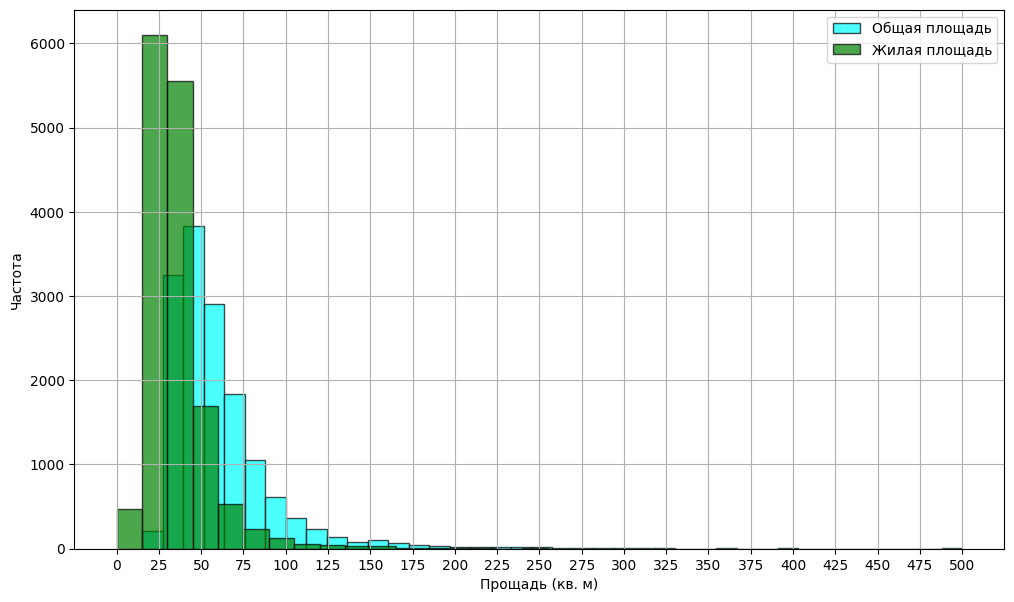

In [46]:
df['total_area'].hist(bins=40, color='aqua', edgecolor='black', figsize=(12,7),alpha=0.7)
df['living_area'].hist(color='g', alpha=0.7,edgecolor='black',bins=20)
plt.xlabel('Прощадь (кв. м)')
plt.ylabel('Частота')
plt.xticks(np.arange(0,501, 25))
plt.legend(['Общая площадь','Жилая площадь'])
plt.show()

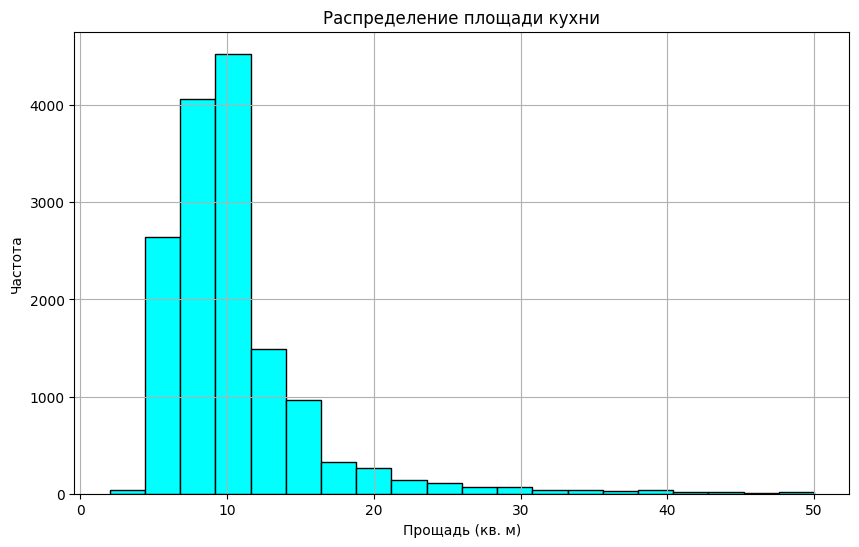

In [47]:
df['kitchen_area'].hist(bins=20, color='aqua', edgecolor='black', figsize=(10,6))
plt.xlabel('Прощадь (кв. м)')
plt.ylabel('Частота')
plt.xticks(np.arange(0,51, 10))
plt.title('Распределение площади кухни')
plt.show()

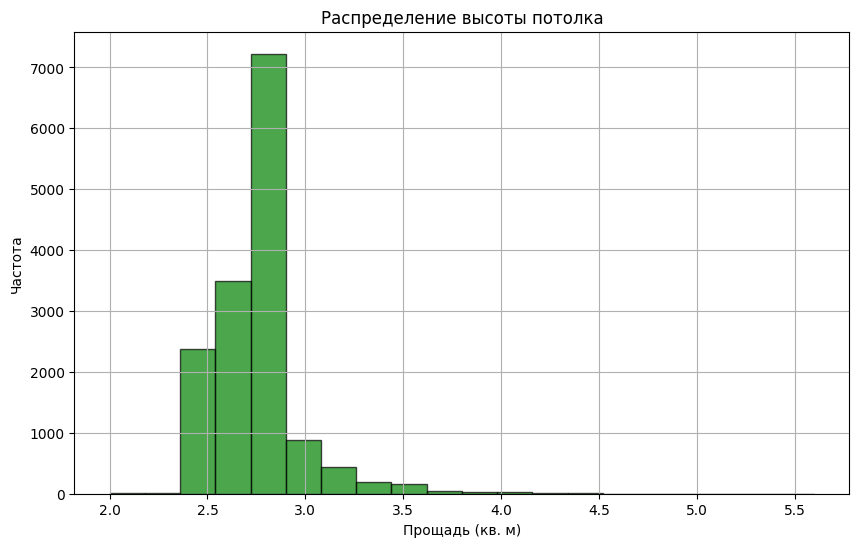

In [48]:
df['ceiling_height'].hist(bins=20, color='g', edgecolor='black', figsize=(10,6), alpha=0.7)
plt.xlabel('Прощадь (кв. м)')
plt.ylabel('Частота')
plt.title('Распределение высоты потолка')
plt.show()

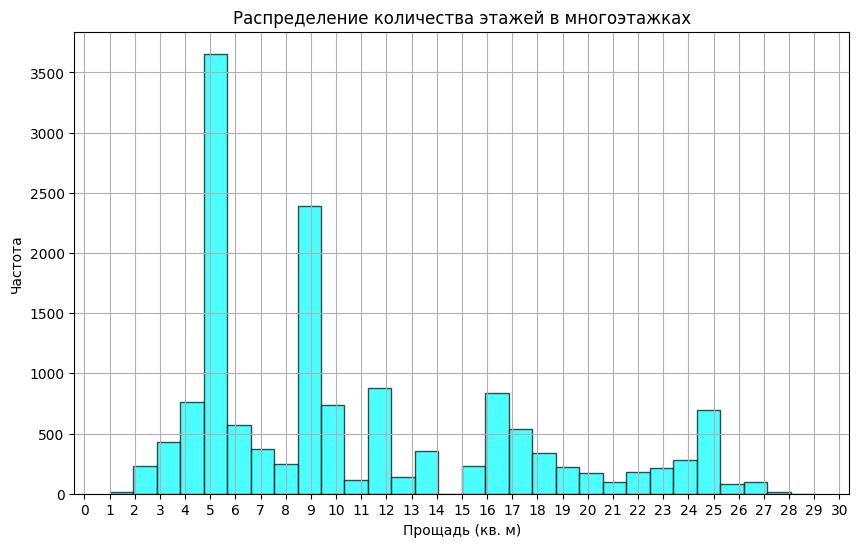

In [49]:
df['floors_total'].hist(bins=30,color='aqua', edgecolor='black', figsize=(10,6), alpha=0.7)
plt.xlabel('Прощадь (кв. м)')
plt.ylabel('Частота')
plt.title('Распределение количества этажей в многоэтажках')
plt.xticks(np.arange(0,31))
plt.show()

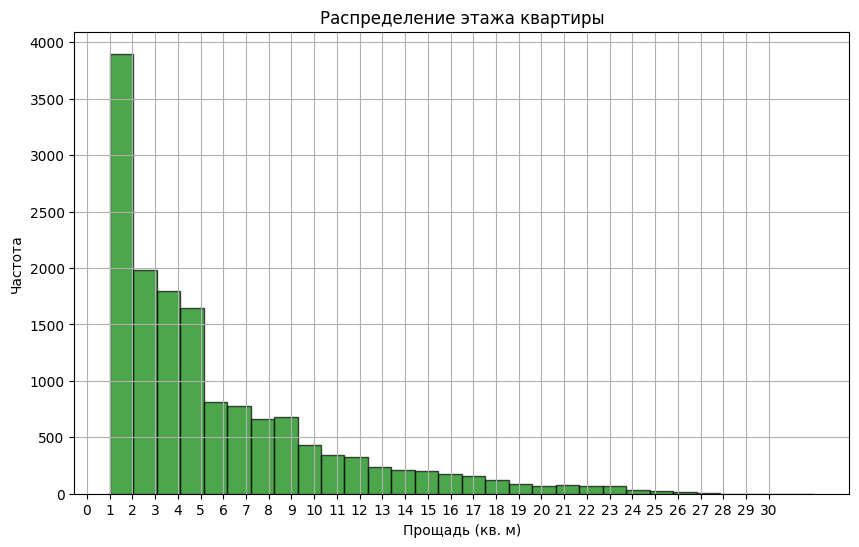

In [50]:
df['floor'].hist(bins=30,color='g', edgecolor='black', figsize=(10,6), alpha=0.7)
plt.xlabel('Прощадь (кв. м)')
plt.ylabel('Частота')
plt.title('Распределение этажа квартиры')
plt.xticks(np.arange(0,31))
plt.show()

In [51]:
df['rooms'].value_counts().sort_index()

,count
rooms,
0.0,113
1.0,5036
2.0,4980
3.0,3686
4.0,744
5.0,222
6.0,67
7.0,42
8.0,7


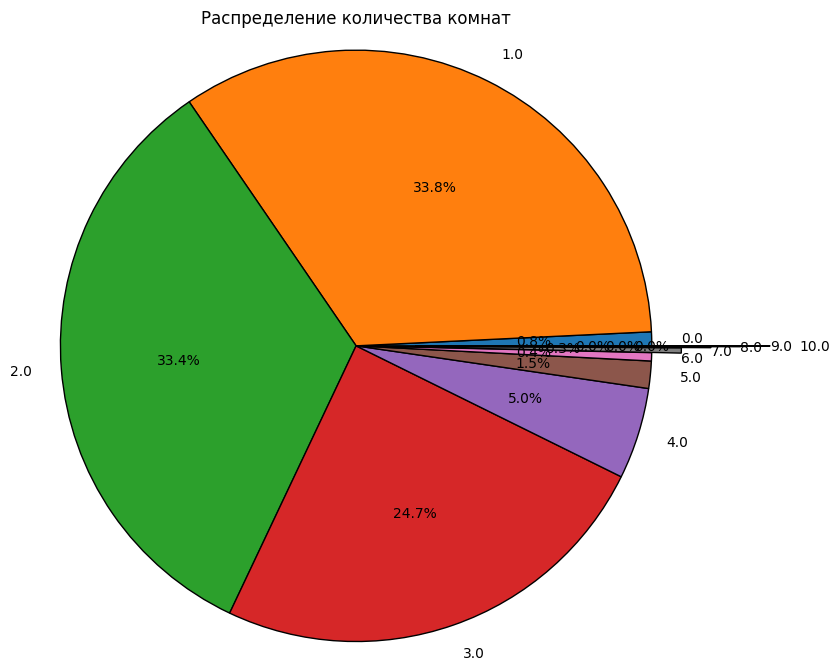

In [52]:
plt.pie(df['rooms'].value_counts().sort_index(),labels=df['rooms'].value_counts().sort_index().index, wedgeprops={'edgecolor':'black'},
        radius=2, autopct="%1.1f%%", explode=(0,0,0,0,0,0,0,0.2,0.4,0.6,0.8))
plt.title('Распределение количества комнат', y=1.35)

plt.show()

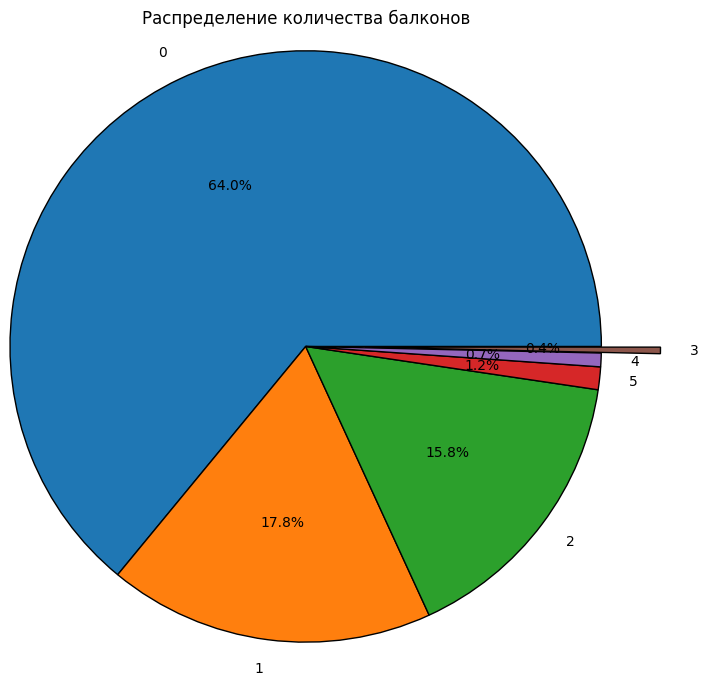

In [53]:
plt.pie(df['balcony'].value_counts(),labels=df['balcony'].value_counts().index,
        wedgeprops={'edgecolor':'black'}, radius=2, autopct="%1.1f%%", explode=(0,0,0,0,0,0.4))
plt.title('Распределение количества балконов', y=1.35)

plt.show()

[]

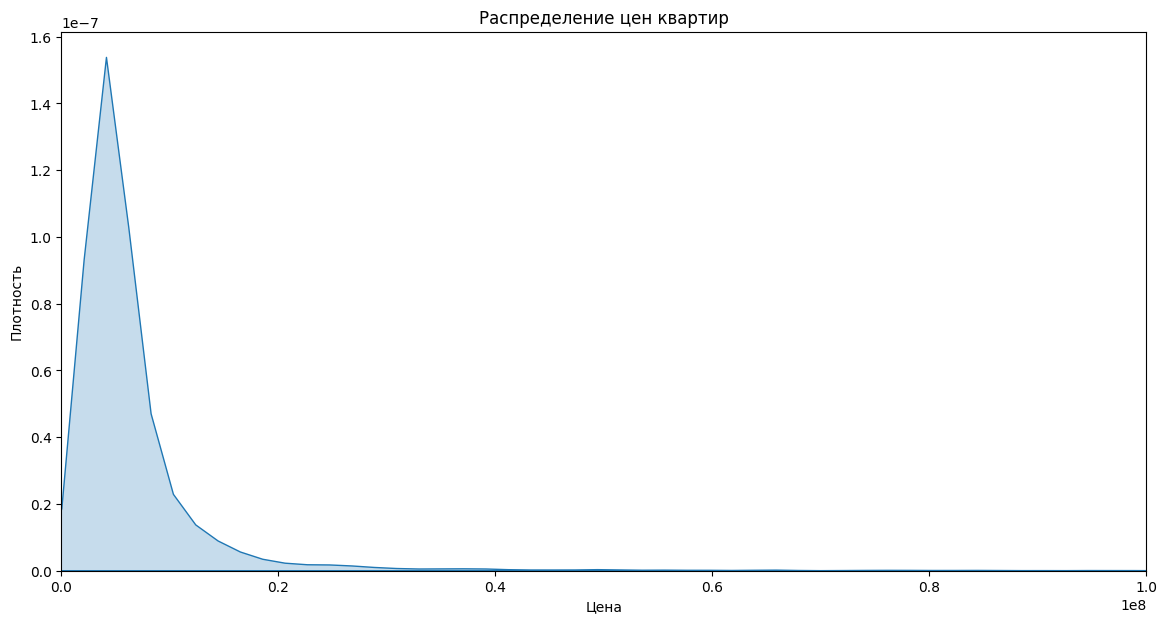

In [54]:
fig = plt.figure(figsize=(14,7))
sns.kdeplot(data=df['last_price'].astype(int), fill=True)
plt.title('Распределение цен квартир')
plt.xlabel('Цена')
plt.ylabel('Плотность')
plt.xlim(0, 10**8)

plt.plot()

[]

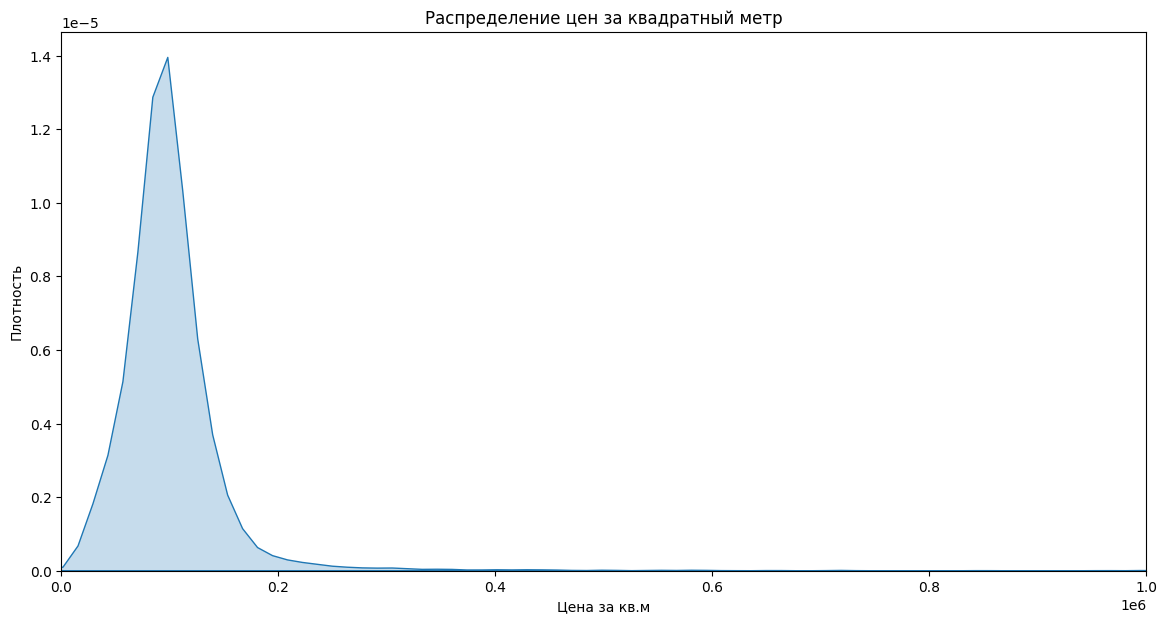

In [55]:
fig = plt.figure(figsize=(14,7))
sns.kdeplot(data=df['price_per_meter'], fill=True)
plt.title('Распределение цен за квадратный метр')
plt.xlabel('Цена за кв.м')
plt.ylabel('Плотность')
plt.xlim(0, 10**6)

plt.plot()

**4.2. Изучим как быстро продовались квартиры**

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14903 entries, 0 to 14988
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            14903 non-null  int64         
 1   last_price              14903 non-null  float64       
 2   total_area              14903 non-null  float64       
 3   first_day_exposition    14903 non-null  datetime64[ns]
 4   rooms                   14903 non-null  float64       
 5   ceiling_height          14903 non-null  float64       
 6   floors_total            14903 non-null  float64       
 7   living_area             14903 non-null  float64       
 8   floor                   14903 non-null  float64       
 9   is_apartment            13804 non-null  object        
 10  studio                  14903 non-null  object        
 11  open_plan               14903 non-null  object        
 12  kitchen_area            14903 non-null  float64    

[]

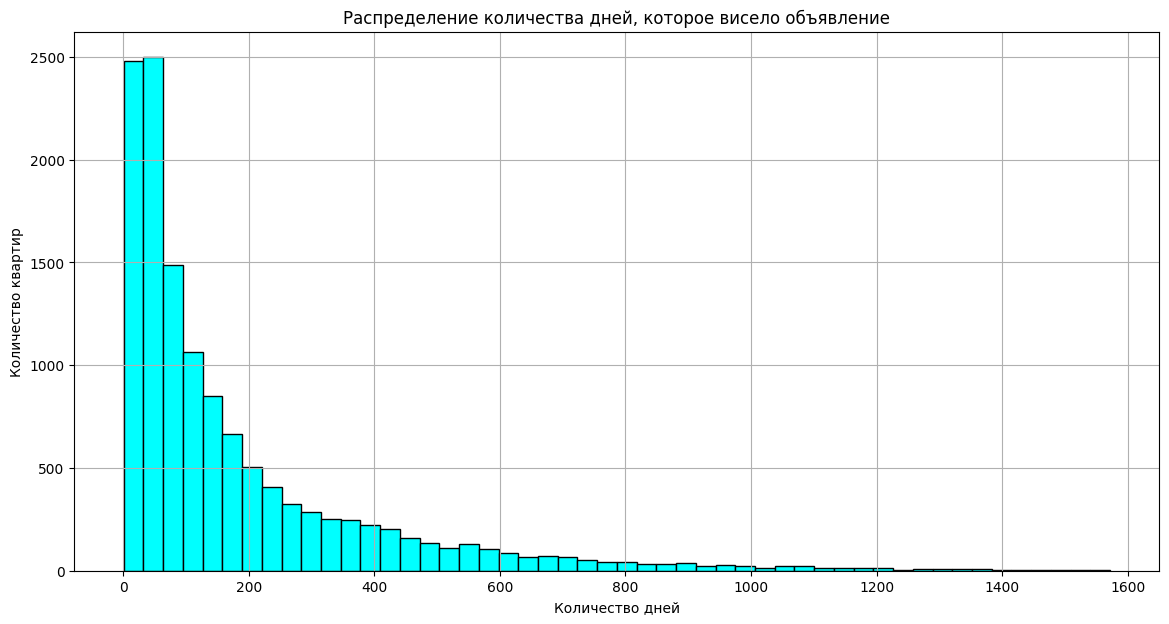

In [57]:
fig = plt.figure(figsize=(14,7))
df['days_exposition'].hist(bins=50, color='aqua', edgecolor='black')
plt.title('Распределение количества дней, которое висело объявление')
plt.xlabel('Количество дней')
plt.ylabel('Количество квартир')

plt.plot()

In [ ]:
df['days_exposition'].describe()

,days_exposition
count,20394.000000
mean,180.741395
std,219.732782
min,1.000000
25%,45.000000
50%,95.000000
75%,231.000000
max,1580.000000


**4.3. Изучим, от каких факторов зависит цена квартиры**

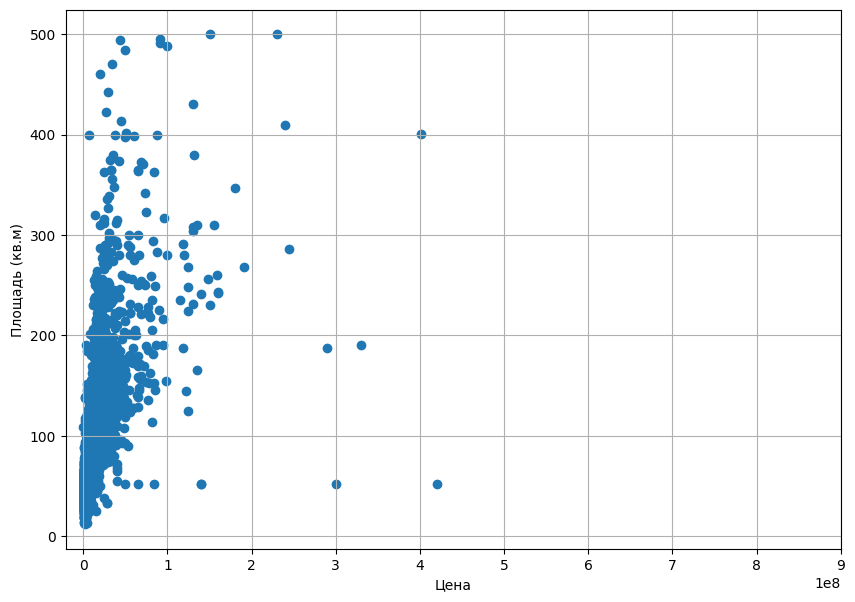


Corr coef: 0.6339151283327603


In [ ]:
fig = plt.figure(figsize=(10,7))

plt.scatter(df['last_price'], df['total_area'])
plt.grid()
plt.xticks(np.arange(0,10)*10**8)
plt.xlabel('Цена')
plt.ylabel('Площадь (кв.м)')

plt.show()
print(f"\nCorr coef: {df['last_price'].corr(df['total_area'])}")

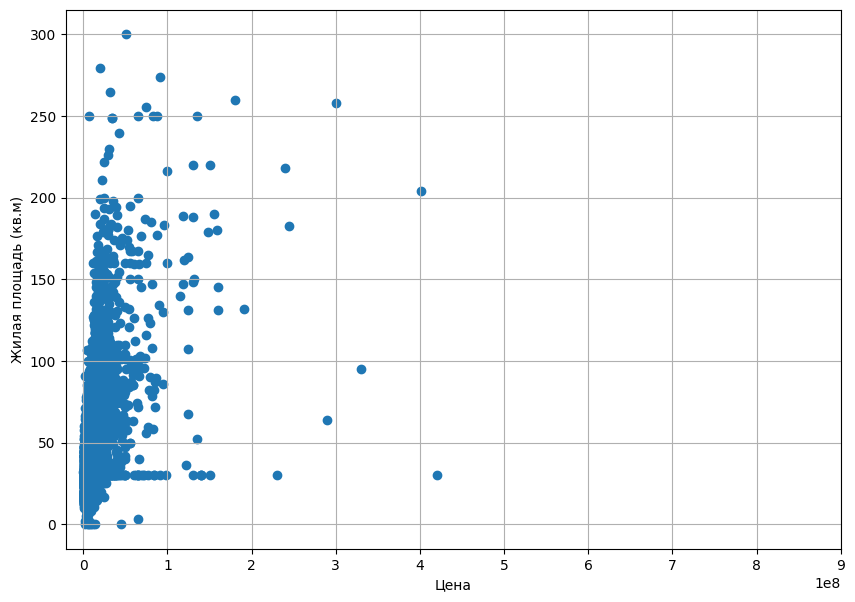


Corr coef: 0.5296353450833278


In [ ]:
fig = plt.figure(figsize=(10,7))

plt.scatter(df['last_price'], df['living_area'])
plt.grid()
plt.xticks(np.arange(0,10)*10**8)
plt.xlabel('Цена')
plt.ylabel('Жилая площадь (кв.м)')

plt.show()
print(f"\nCorr coef: {df['last_price'].corr(df['living_area'])}")

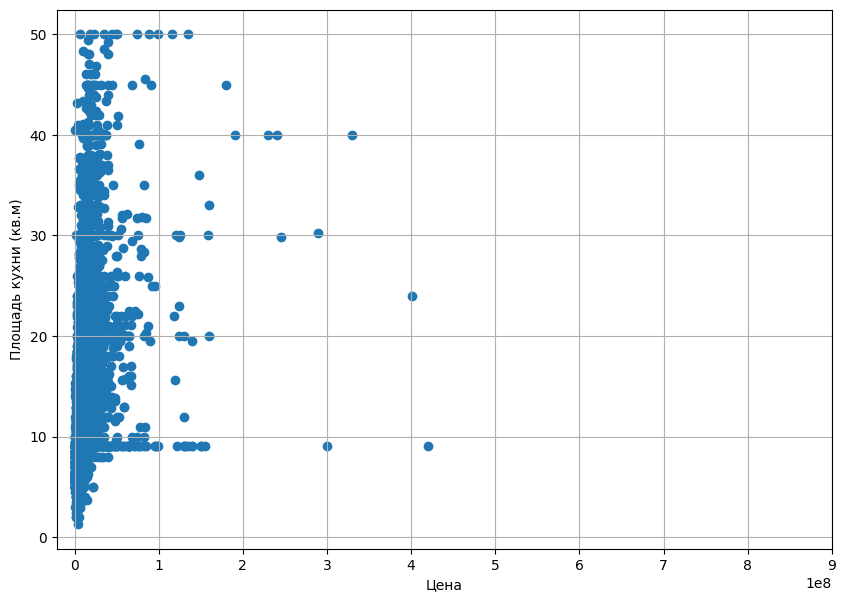


Corr coef: 0.4037151055394945


In [ ]:
fig = plt.figure(figsize=(10,7))

plt.scatter(df['last_price'], df['kitchen_area'])
plt.grid()
plt.xticks(np.arange(0,10)*10**8)
plt.xlabel('Цена')
plt.ylabel('Площадь кухни (кв.м)')

plt.show()
print(f"\nCorr coef: {df['last_price'].corr(df['kitchen_area'])}")

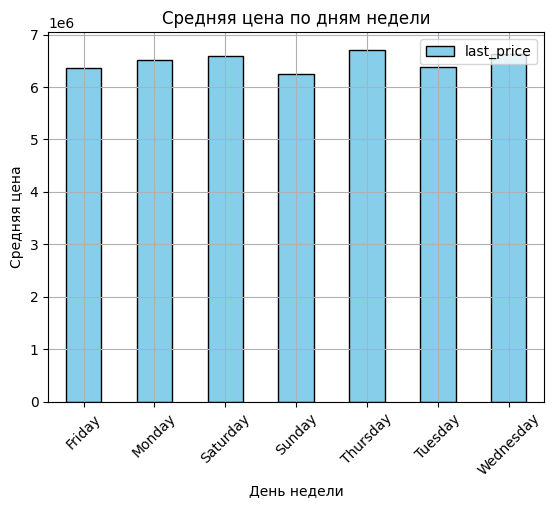

In [ ]:
first_week_exposition = df.pivot_table(index='exposition_week', values='last_price', aggfunc='mean')
first_week_exposition.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('День недели')
plt.ylabel('Средняя цена')
plt.title('Средняя цена по дням недели')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

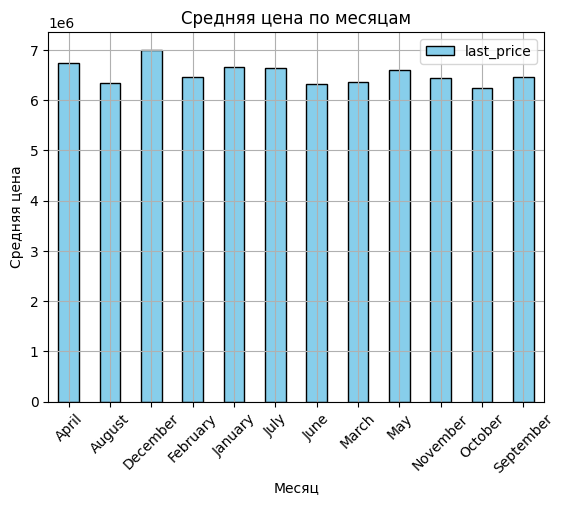

In [ ]:
first_month_exposition = df.pivot_table(index='first_month_exposition', values='last_price', aggfunc='mean')
first_month_exposition.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Месяц')
plt.ylabel('Средняя цена')
plt.title('Средняя цена по месяцам')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

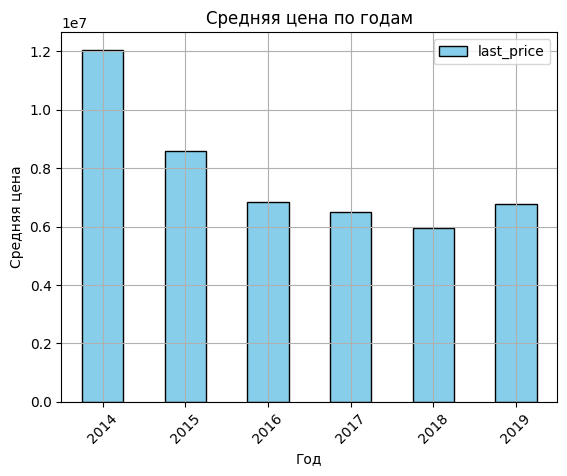

In [ ]:
first_year_exposition = df.pivot_table(index='first_year_exposition', values='last_price', aggfunc='mean')
first_year_exposition.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Год')
plt.ylabel('Средняя цена')
plt.title('Средняя цена по годам')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
df_correlation = df.select_dtypes(include=['int32', 'int64', 'Int64', 'float']).corr()
df_correlation

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,first_year_exposition
total_images,1.000000,0.112422,0.117232,0.103354,0.027521,0.007407,0.107052,0.032781,0.106369,0.046879,-0.002701,-0.048103,0.020955,-0.006456,-0.011352,0.012497,-0.027340,0.086797,0.139238
last_price,0.112422,1.000000,0.633915,0.374087,0.321874,-0.007284,0.529635,0.027295,0.403715,0.004776,-0.028442,-0.228038,0.168918,-0.030891,0.171999,-0.122676,0.095181,0.706141,-0.046864
total_area,0.117232,0.633915,1.000000,0.756759,0.388228,-0.078272,0.862537,-0.028377,0.534096,0.012425,-0.031165,-0.235587,0.173662,-0.033909,0.166542,-0.119443,0.153517,0.164858,-0.083525
rooms,0.103354,0.374087,0.756759,1.000000,0.226953,-0.231705,0.806036,-0.154473,0.240821,-0.014091,-0.061164,-0.183481,0.140670,-0.054810,0.093629,-0.064921,0.125873,0.055084,-0.054799
ceiling_height,0.027521,0.321874,0.388228,0.226953,1.000000,-0.060257,0.350102,-0.028039,0.321126,-0.074164,-0.083174,-0.295817,0.221469,-0.059889,0.191971,-0.141701,0.097319,0.189777,-0.098483
floors_total,0.007407,-0.007284,-0.078272,-0.231705,-0.060257,1.000000,-0.166472,0.672391,0.178217,0.173832,0.114307,0.012396,-0.252382,0.085205,-0.141197,0.084574,-0.052447,0.091718,0.006771
living_area,0.107052,0.529635,0.862537,0.806036,0.350102,-0.166472,1.000000,-0.097251,0.375569,-0.007935,-0.056611,-0.224458,0.178889,-0.056050,0.144825,-0.104315,0.142953,0.142759,-0.075345
floor,0.032781,0.027295,-0.028377,-0.154473,-0.028039,0.672391,-0.097251,1.000000,0.144575,0.171507,0.073129,0.008336,-0.163601,0.060353,-0.076240,0.045172,-0.039042,0.089220,0.005404
kitchen_area,0.106369,0.403715,0.534096,0.240821,0.321126,0.178217,0.375569,0.144575,1.000000,0.057484,0.011136,-0.188262,0.080850,0.016188,0.144731,-0.112207,0.106292,0.202848,-0.056000
balcony,0.046879,0.004776,0.012425,-0.014091,-0.074164,0.173832,-0.007935,0.171507,0.057484,1.000000,0.049629,0.065257,-0.078478,0.030463,-0.039443,0.033385,-0.027504,0.008027,0.002874


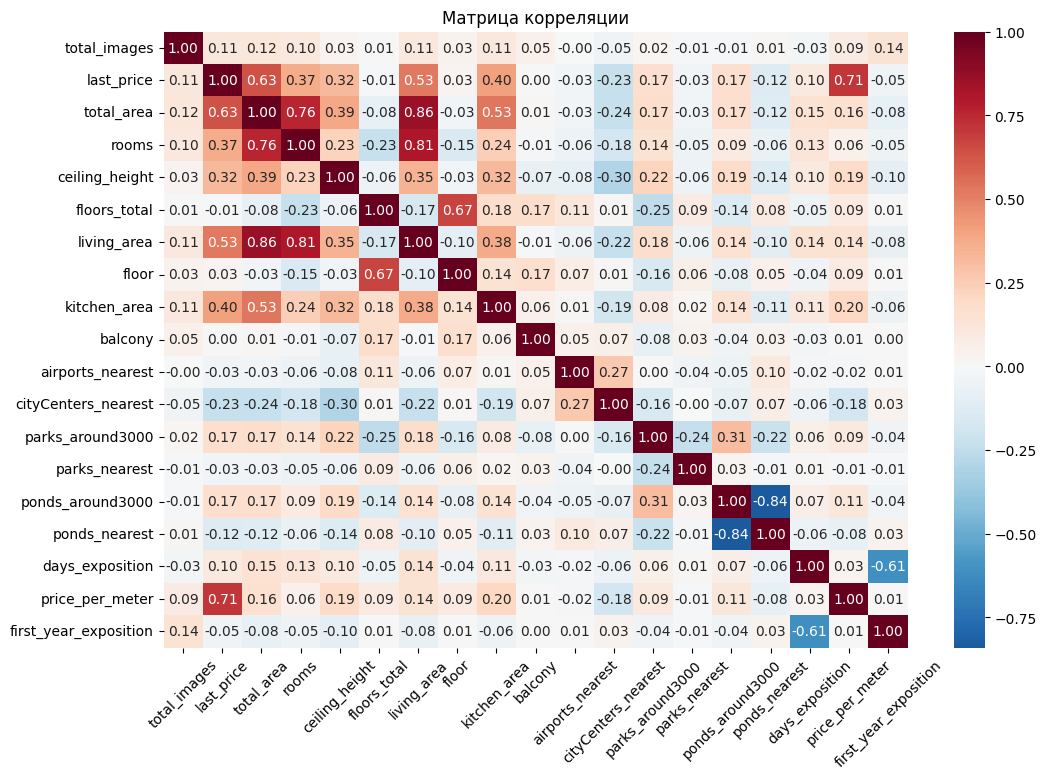

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_correlation, annot=True, fmt=".2f", cmap="RdBu_r", center=0)

plt.title('Матрица корреляции')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

Из вышепредставленных визуализаций, можно сделать вывод, что **цена квартиры**(last_price) сильнее всего заваисит от:


*   Общей площади(total_area, corr_coef = 0.63)
*   Количества комнат(rooms, corr_coef = 0.37)
*   Высоты потолка(ceiling_height, corr_coef = 0.32)
*   Жилой площади(living_area, corr_coef = 0.53)
*   Площади кухни(kitchen_area, corr_coef = 0.4)



Так же следует отметить снижение цен на квартиры к 2017,2018 годам. Скорее всего это связано с экономическим благополучием страны. Если взглянуть на график изменения ключевой ставки ЦБ, то наша гипотеза выглядит вполне правдаподобной.

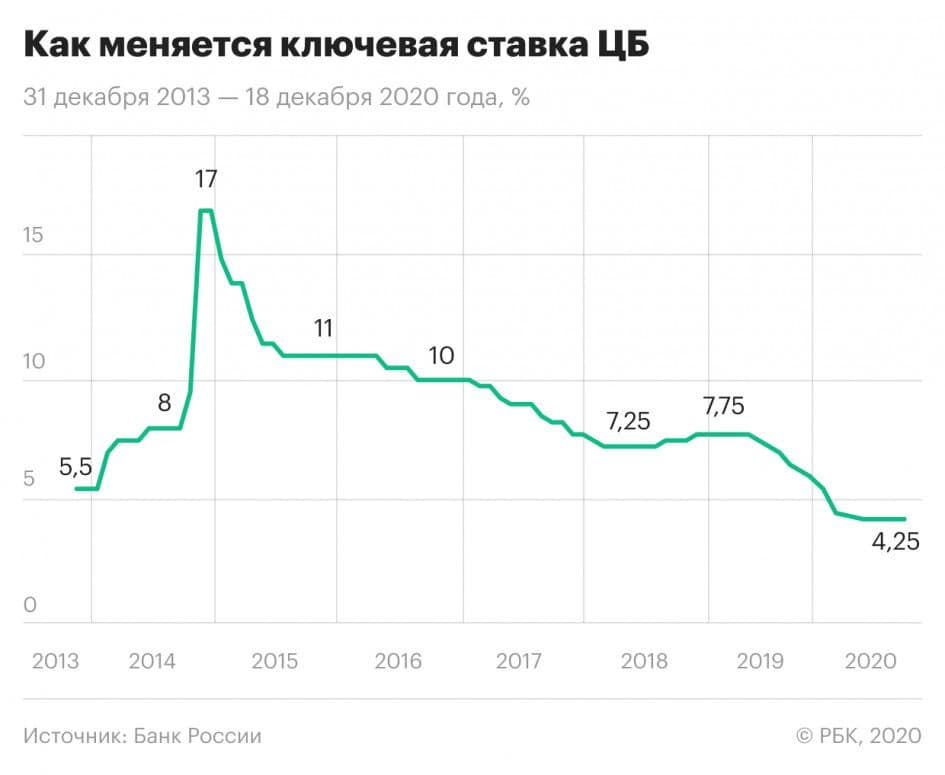

**4.4 Расчет средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.**

In [ ]:
most_popular_cities = (df['locality_name'].value_counts() / df.shape[0] * 100).head(10)

In [ ]:
for i in most_popular_cities.index:
  print(f"Средняя цена за кв.м. {i}: {round(df.loc[df['locality_name'] == i, 'price_per_meter'].mean(),2)} рублей")

Средняя цена за кв.м. санкт-петербург: 116108.3 рублей
Средняя цена за кв.м. поселок мурино: 85629.57 рублей
Средняя цена за кв.м. поселок шушары: 78551.34 рублей
Средняя цена за кв.м. всеволожск: 68654.47 рублей
Средняя цена за кв.м. пушкин: 103125.82 рублей
Средняя цена за кв.м. колпино: 75424.58 рублей
Средняя цена за кв.м. поселок парголово: 90175.91 рублей
Средняя цена за кв.м. гатчина: 68746.15 рублей
Средняя цена за кв.м. деревня кудрово: 92473.55 рублей
Средняя цена за кв.м. выборг: 58141.91 рублей


**4.5  Выделение населённых пунктов с самой высокой и низкой стоимостью квадратного метра.**

In [ ]:
df.groupby('locality_name').agg({'price_per_meter':'mean'}).sort_values('price_per_meter', ascending=False).head(10).reset_index()

,locality_name,price_per_meter
0,санкт-петербург,116108.300210
1,зеленогорск,115122.799583
2,поселок репино,104238.612500
3,пушкин,103125.819377
4,сестрорецк,101757.616831
5,поселок лисий нос,100660.816667
6,кудрово,100134.543626
7,деревня мистолово,98549.977273
8,поселок левашово,96997.690000
9,мурино,92722.708824


В данном Датафрейме представлены 10 городов с наибольшей стоимостью 1 кв.м.

In [ ]:
df.groupby('locality_name').agg({'price_per_meter':'mean'}).sort_values('price_per_meter', ascending=True).head(10).reset_index()

,locality_name,price_per_meter
0,деревня старополье,11206.220
1,поселок станции свирь,11481.480
2,деревня вахнова кара,11688.310
3,деревня выскатка,12335.480
4,поселок совхозный,12629.130
5,деревня малая романовка,12724.550
6,поселок тесово-4,12931.030
7,деревня сижно,13709.680
8,деревня ям-тесово,13711.555
9,поселок житково,14956.275


В данном Датафрейме представлены 10 городов с наименьшей стоимостью 1 кв.м.

**Вывод:**

Цены на недвижимость зависят от местоположения и размера населенного пункта. Очевидно, что в Питере, как в культурной столице, цены наиболее высокие, а в более удаленных и маленьких городках цены ниже.

# Этап 5: Общий вывод

В ходе выполнения проекта были обнаружены следующие инсайты и выводы на основе предоставленных данных:


*   Средняя продолжительность продажи квартиры составляет примерно 180.75 дней, со стандартным отклонением около 219.78 дней. Медианное значение равно 95 дням.
*   Местоположение и размер населенного пункта оказывают влияние на цены недвижимости. Цены на недвижимость в Петербурге, как в культурной столице, наиболее высокие, в то время как в удаленных и маленьких городах цены ниже.

Рекомендации для улучшения площадки объявлений:
*  Обеспечить надежность данных и валидацию на сервере для предотвращения появления отсутствующих значений и обеспечения качества данных;

*  Автоматизировать сбор информации о близости к паркам, водоемам и аэропортам, а также информацию о сериях домов, чтобы упростить заполнение информации о квартирах;

*  Улучшить представление данных, для расчета расстояний и предоставить пользователю более наглядную информацию о расстоянии до объектов;

*   Рекомендуется предупреждать пользователей о возможных некорректных значениях и предоставлять референсные данные, например, о ценах на квартиры в их жилом доме, для помощи в определении правильной цены.

